In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Import fetch_20newsgroups dataset
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
data = newsgroups.data

In [2]:
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [3]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

data=pd.DataFrame(data)
data=data.sample(frac=1) 
data.reset_index(inplace=True)
data.columns=['ID','Text']

data

,ID,Text
0,9354,"\nWhich, considering the amount Bush&congress ..."
1,5950,Chapter 7 operation in Somlia. Almost Cha...
2,9976,"you Need gs252ini.zip and 24*.zip, and 25*.zip..."
3,4866,Here are some corrections and additions to Hel...
4,1004,\n\n\n ^^^^^^^ Militia...
...,...,...
11309,6075,Some one asked me recently why they when they ...
11310,1842,Does anybody have any solid data on how many l...
11311,251,"\nIt likely has nothing to do with ""chunks of ..."
11312,6360,"Is it not the case that, in the eyes of the la..."


In [5]:
from bs4 import BeautifulSoup
import contractions
import re

# Remove html
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['Text'] = data['Text'].apply(remove_html)

# Remove numbers
def remove_number(text):
    text = re.sub(r'\d+', '', text)
    return text

data['Text'] = data['Text'].apply(remove_number)

# Rplace contractions
def replace_contractions(text):
    return contractions.fix(text)

data['Text'] = data['Text'].apply(replace_contractions)

data

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,ID,Text
0,9354,"\nWhich, considering the amount Bush&congress ..."
1,5950,Chapter operation in Somlia. Almost Chap...
2,9976,"you Need gsini.zip and *.zip, and *.zip font f..."
3,4866,Here are some corrections and additions to Hel...
4,1004,\n\n\n ^^^^^^^ Militia...
...,...,...
11309,6075,Some one asked me recently why they when they ...
11310,1842,Does anybody have any solid data on how many l...
11311,251,"\nIt likely has nothing to do with ""chunks of ..."
11312,6360,"Is it not the case that, in the eyes of the la..."


In [6]:
# Tokenization of data
import nltk
from nltk.tokenize import word_tokenize

data['Text'] = data.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) 
data

,ID,Text
0,9354,"[Which, ,, considering, the, amount, Bush, &, ..."
1,5950,"[Chapter, operation, in, Somlia, ., Almost, Ch..."
2,9976,"[you, Need, gsini.zip, and, *, .zip, ,, and, *..."
3,4866,"[Here, are, some, corrections, and, additions,..."
4,1004,"[^^^^^^^, Militia, ^^^^^, State, ^^^^, Arms, Y..."
...,...,...
11309,6075,"[Some, one, asked, me, recently, why, they, wh..."
11310,1842,"[Does, anybody, have, any, solid, data, on, ho..."
11311,251,"[It, likely, has, nothing, to, do, with, ``, c..."
11312,6360,"[Is, it, not, the, case, that, ,, in, the, eye..."


In [7]:
# Preprocess the words
import re, string, unicodedata 
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
stop_words=list(set(stop_words))
lemmatizer = WordNetLemmatizer()


# Convert words to lowercase
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove stopwords
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stop_words and word not in ('would', 'may', 'one', 'will', 'also', 'us', 'use', 'get'):
            new_words.append(word)
    return new_words

# Remove punctuation
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Lemmatization of words
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yizhao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yizhao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['Text'] = data.apply(lambda row: normalize(row['Text']), axis=1)
data

,ID,Text
0,9354,consider amount bush congress add notinconside...
1,5950,chapter operation somlia almost chapter cambod...
2,9976,need gsinizip zip zip font file wuarchivewustl...
3,4866,corrections additions hellman note courtesy do...
4,1004,militia state arm even capitalization correct ...
...,...,...
11309,6075,ask recently use xquerybestcursor see could cr...
11310,1842,anybody solid data many legally own versus ill...
11311,251,likely nothing chunk plaque sound like neurova...
11312,6360,case eye law someone aware something capabilit...


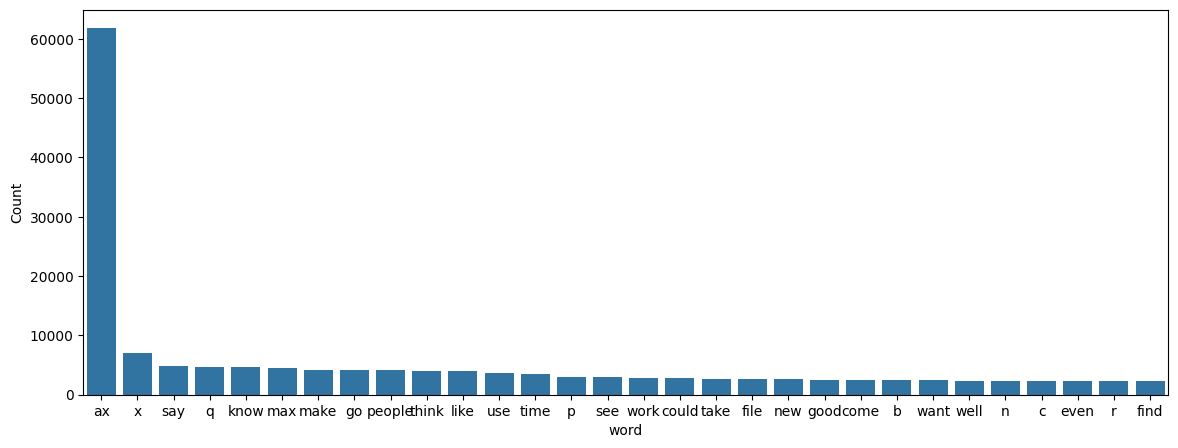

In [9]:
# Create Bag of Words
import seaborn as sns
from nltk import FreqDist

def BoG(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
  
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(14,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

BoG(data['Text'], 30)

In [10]:
# Since 'ax' appears too many times and seems meaningless, remove it for further analysis
data['Text'] = data['Text'].apply(lambda x: ' '.join([w for w in x.split() if w != 'ax']))

# remove words whose length less than 2
data['Text'] = data['Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

data['Text'] = data['Text'].apply(lambda x: ' '.join([w for w in x.split() if w != 'go']))

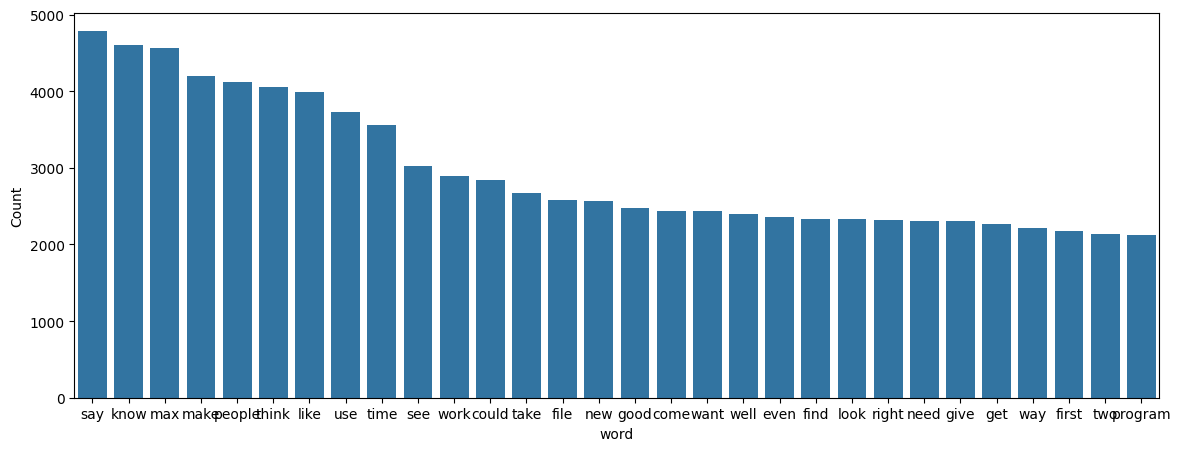

In [11]:
BoG(data['Text'], 30)

In [12]:
# Tokenization of data
word_tokens = data.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) 
word_tokens[:5]

0    [consider, amount, bush, congress, add, notinc...
1    [chapter, operation, somlia, almost, chapter, ...
2    [need, gsinizip, zip, zip, font, file, wuarchi...
3    [corrections, additions, hellman, note, courte...
4    [militia, state, arm, even, capitalization, co...
dtype: object

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

model_list=[]
coherence_values=[]
start, stop, step=8,16,2
for num_topix in range(start, stop, step):
    model = LDA(corpus=doc_term_matrix,id2word=dictionary,num_topics=num_topix)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=word_tokens, dictionary=dictionary, coherence='u_mass')
    coherence_values.append(coherencemodel.get_coherence())

In [ ]:
x=range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.show()

In [71]:
# Build the LDA model
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(word_tokens)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in word_tokens]
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=doc_term_matrix,id2word=dictionary,num_topics=10)

lda_model.print_topics()

[(0,
  '0.022*"god" + 0.008*"jesus" + 0.007*"say" + 0.006*"believe" + 0.006*"bible" + 0.005*"people" + 0.005*"know" + 0.005*"think" + 0.004*"make" + 0.004*"christian"'),
 (1,
  '0.010*"use" + 0.009*"key" + 0.006*"know" + 0.005*"system" + 0.005*"work" + 0.005*"card" + 0.005*"windows" + 0.005*"thank" + 0.005*"need" + 0.005*"chip"'),
 (2,
  '0.010*"say" + 0.009*"people" + 0.007*"know" + 0.007*"think" + 0.006*"make" + 0.006*"like" + 0.006*"time" + 0.005*"take" + 0.004*"see" + 0.004*"could"'),
 (3,
  '0.006*"drive" + 0.006*"like" + 0.006*"use" + 0.004*"work" + 0.004*"know" + 0.004*"do" + 0.004*"new" + 0.004*"price" + 0.004*"good" + 0.004*"time"'),
 (4,
  '0.021*"max" + 0.005*"gm" + 0.005*"program" + 0.004*"file" + 0.004*"oname" + 0.004*"printf" + 0.003*"check_io" + 0.003*"bf" + 0.003*"undefined" + 0.003*"widget"'),
 (5,
  '0.005*"vat" + 0.003*"like" + 0.003*"work" + 0.003*"__" + 0.003*"know" + 0.003*"radar" + 0.003*"use" + 0.003*"monitor" + 0.003*"look" + 0.003*"driver"'),
 (6,
  '0.007*"pl

In [72]:
from pprint import pprint
topics = lda_model.show_topics(formatted=False, num_topics=10)

# The top words for each topic
top_words = [(topic[0], [word[0] for word in topic[1]]) for topic in topics]
pprint(top_words)

[(0,
  ['god',
   'jesus',
   'say',
   'believe',
   'bible',
   'people',
   'know',
   'think',
   'make',
   'christian']),
 (1,
  ['use',
   'key',
   'know',
   'system',
   'work',
   'card',
   'windows',
   'thank',
   'need',
   'chip']),
 (2,
  ['say',
   'people',
   'know',
   'think',
   'make',
   'like',
   'time',
   'take',
   'see',
   'could']),
 (3,
  ['drive',
   'like',
   'use',
   'work',
   'know',
   'do',
   'new',
   'price',
   'good',
   'time']),
 (4,
  ['max',
   'gm',
   'program',
   'file',
   'oname',
   'printf',
   'check_io',
   'bf',
   'undefined',
   'widget']),
 (5,
  ['vat',
   'like',
   'work',
   '__',
   'know',
   'radar',
   'use',
   'monitor',
   'look',
   'driver']),
 (6,
  ['play',
   'flyers',
   'game',
   'period',
   'st',
   'la',
   'score',
   'vs',
   'season',
   'van']),
 (7,
  ['file',
   'program',
   'available',
   'include',
   'anonymous',
   'information',
   'ftp',
   'list',
   'post',
   'server']),
 (8,
  ['sa

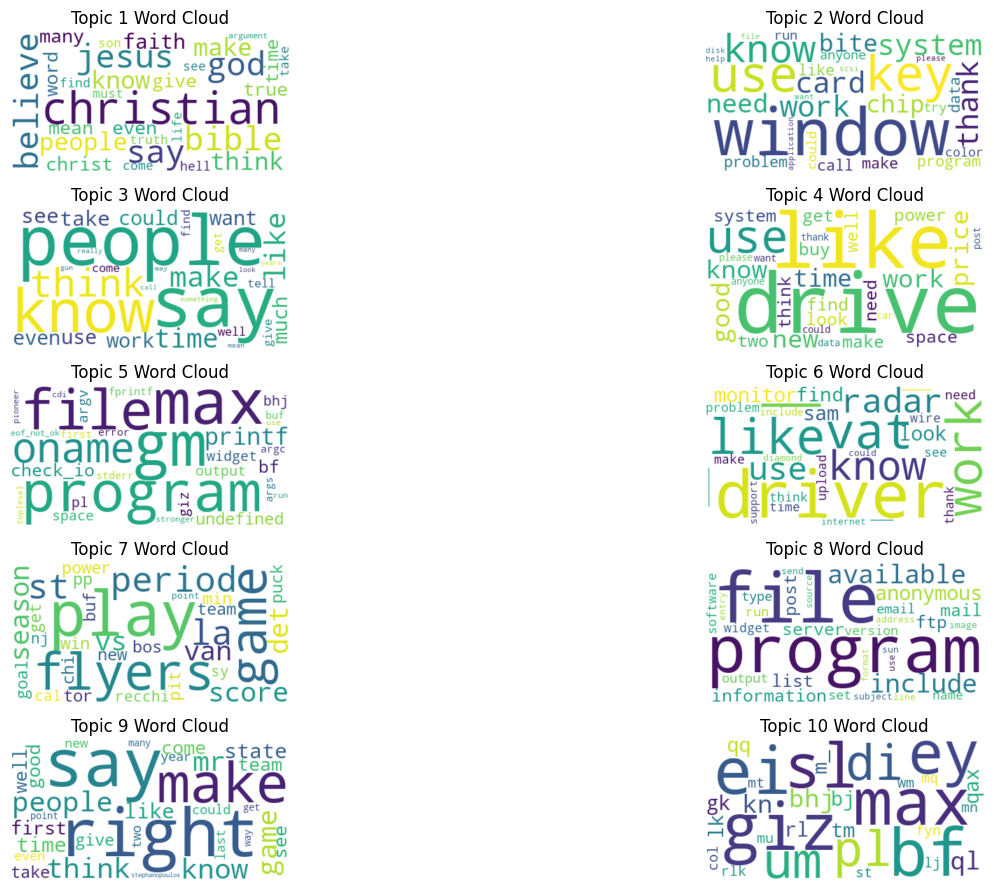

In [73]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import models

def generate_wordcloud(ax, lda_model, topic_id, num_words=30):
    topic_words = lda_model.show_topic(topic_id, topn=num_words)
    wordcloud_text = ' '.join([word[0] for word in topic_words])

    # Create the word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='white', stopwords=stopwords.words('english')).generate(wordcloud_text)

    # Plot the WordCloud image
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {topic_id + 1} Word Cloud')

num_topics = lda_model.num_topics
fig, axes = plt.subplots(5,2, figsize=(18, 9))

# Generate word clouds for each topic
for topic_id, ax in enumerate(axes.flat):
    if topic_id < num_topics:
        generate_wordcloud(ax, lda_model, topic_id)
    else:
        ax.axis('off') 
plt.tight_layout()
plt.show()

In [57]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.134416  0.020915       1        1  36.558958
4      0.105618 -0.105377       2        1  21.457202
0      0.078472  0.092838       3        1  13.884458
6      0.051170 -0.106349       4        1   7.966887
1      0.052301  0.036916       5        1   6.066542
2     -0.353399 -0.060925       6        1   5.585676
5     -0.100309  0.157960       7        1   4.510039
7      0.031732 -0.035979       8        1   3.970239, topic_info=          Term         Freq        Total Category  logprob  loglift
8142       max  6823.000000  6823.000000  Default  30.0000  30.0000
1913      team  1103.000000  1103.000000  Default  29.0000  29.0000
627      drive  1384.000000  1384.000000  Default  28.0000  28.0000
62        file  2530.000000  2530.000000  Default  27.0000  27.0000
255     people  4272.000000  4272.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
618   software    85.878160   982.041809   Topic8  -6.2097   0.7896
628       find    97.000110  2565.831746   Topic8  -6.0879  -0.0490
255     people   101.454356  4272.384799   Topic8  -6.0430  -0.5140
62        file    94.983452  2530.569620   Topic8  -6.1089  -0.0562
78         set    89.395691  1483.986993   Topic8  -6.1695   0.4169

[684 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
48171      5  0.975311      abdullah
34594      8  0.951932     absolutes
16345      4  0.043699  accelerators
16345      8  0.917689  accelerators
7860       1  0.972395         acids
...      ...       ...           ...
533        8  0.016029          year
27824      5  0.973101          yoke
15460      6  0.982549        youyou
36338      2  0.985736          zeos
12125      5  0.963389       zionist

[2668 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 7, 2, 3, 6, 8])